# 1. Импортируем библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             roc_curve, auc)

In [2]:
current_directory = Path.cwd()
DATA_PATH = current_directory.parent / 'data/adult.csv'

# 2. Проводим первичный анализ данных

In [3]:
data = pd.read_csv(DATA_PATH)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.duplicated().sum()

52

## 2.1. Категориальные признаки

Feature: workclass
Number of unique values: 9
Value counts:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Feature: education
Number of unique values: 16
Value counts:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Feature: marital-status
Number of unique values: 7
Value counts:
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed        

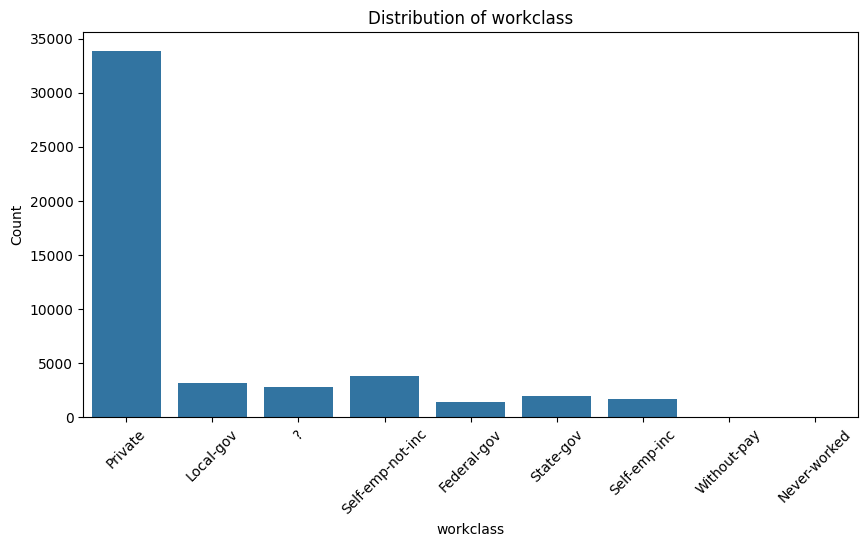

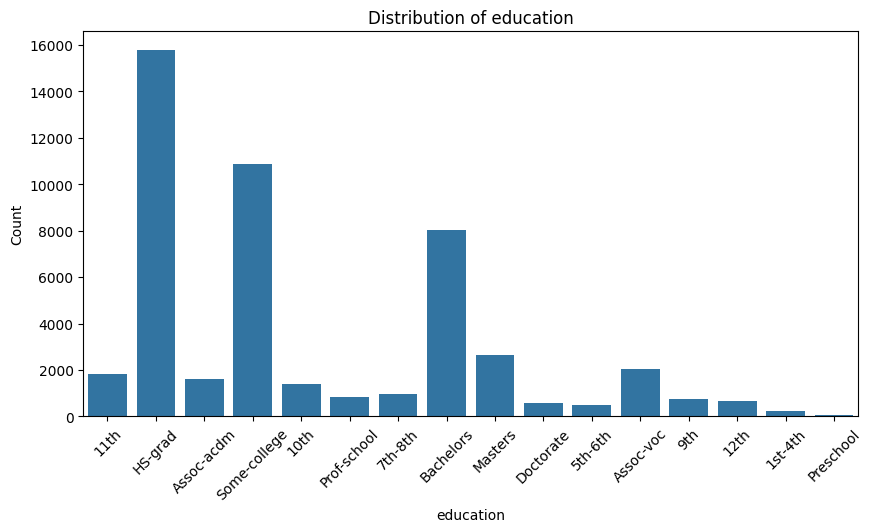

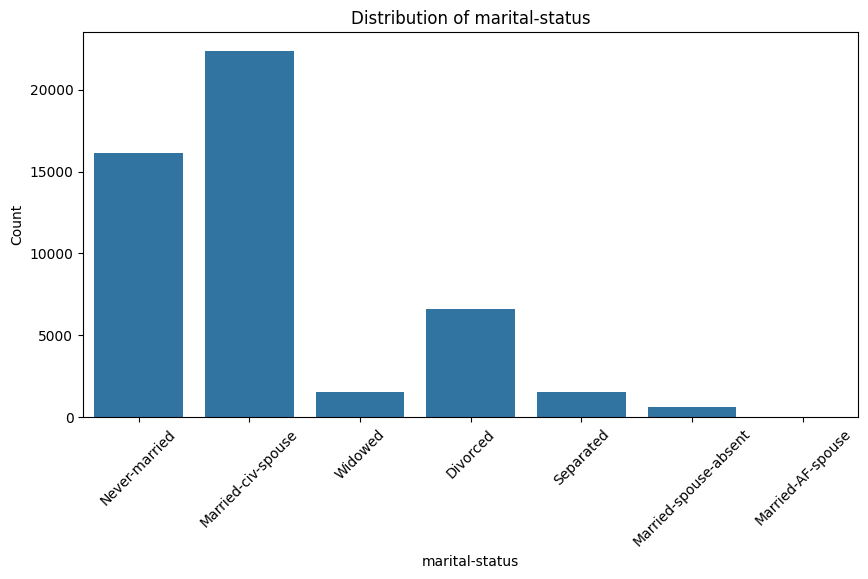

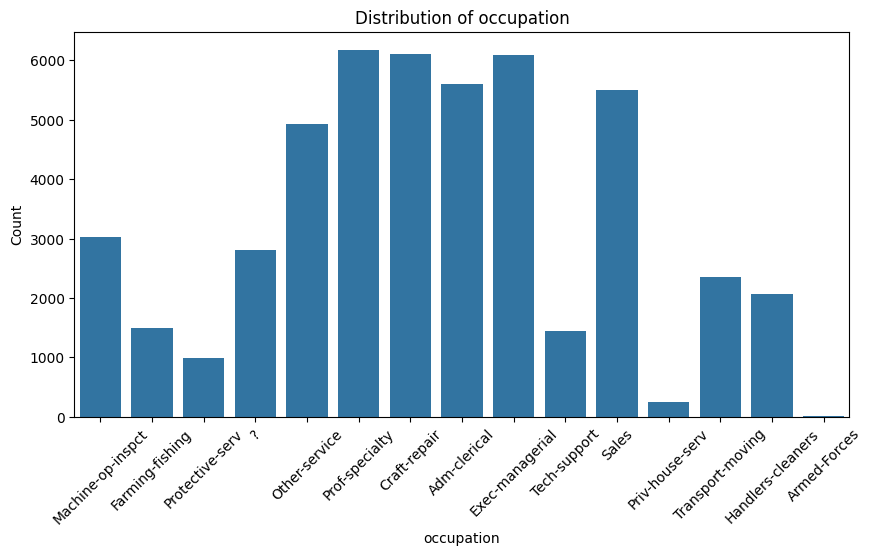

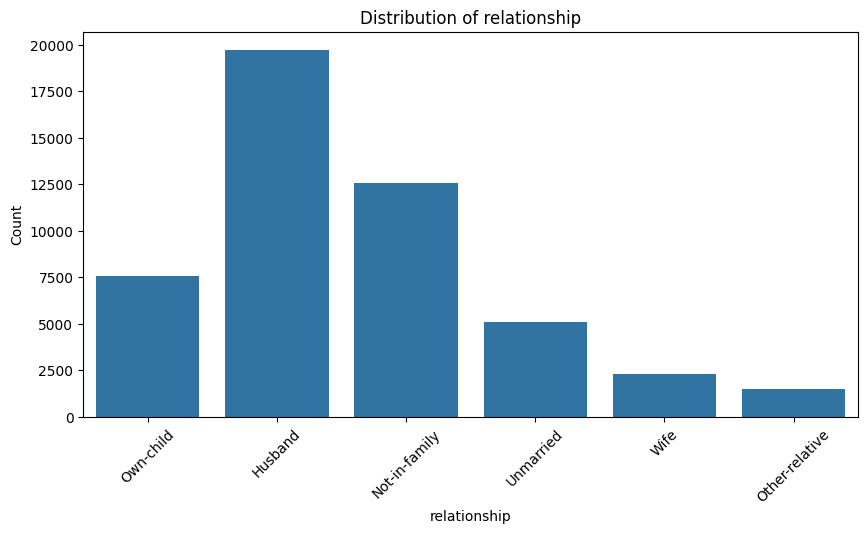

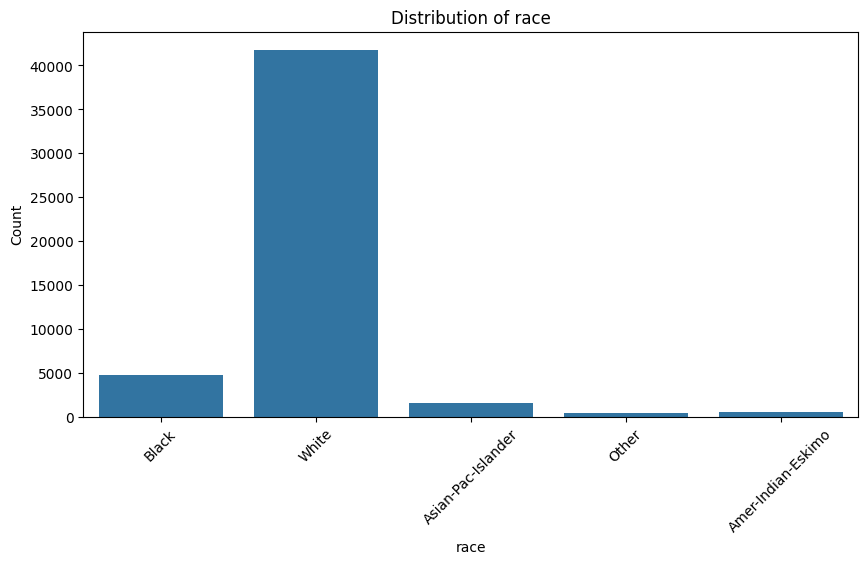

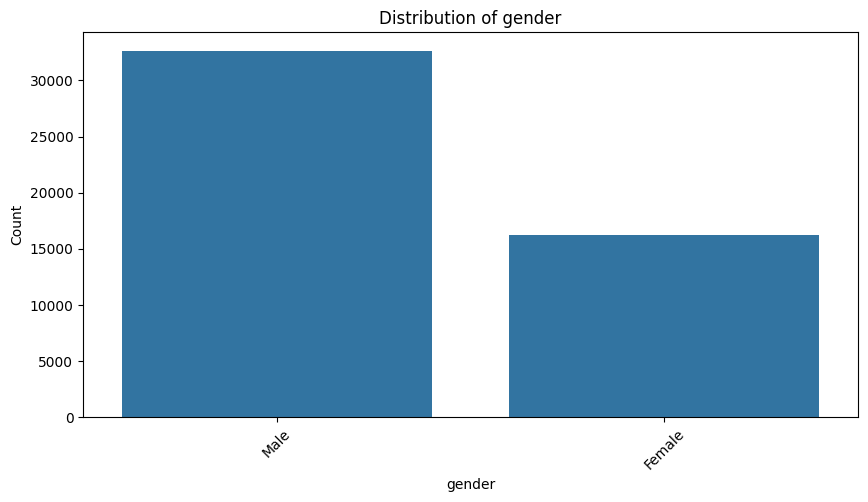

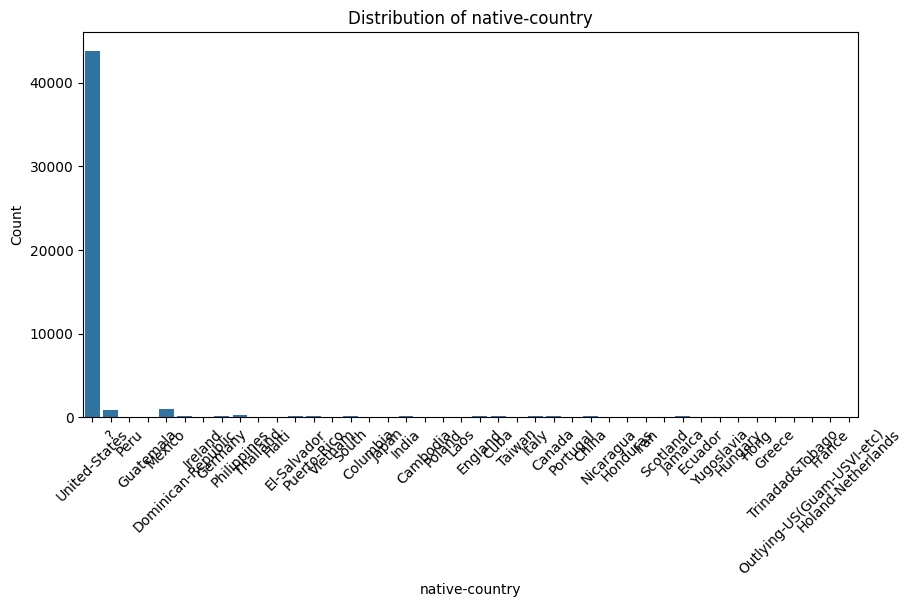

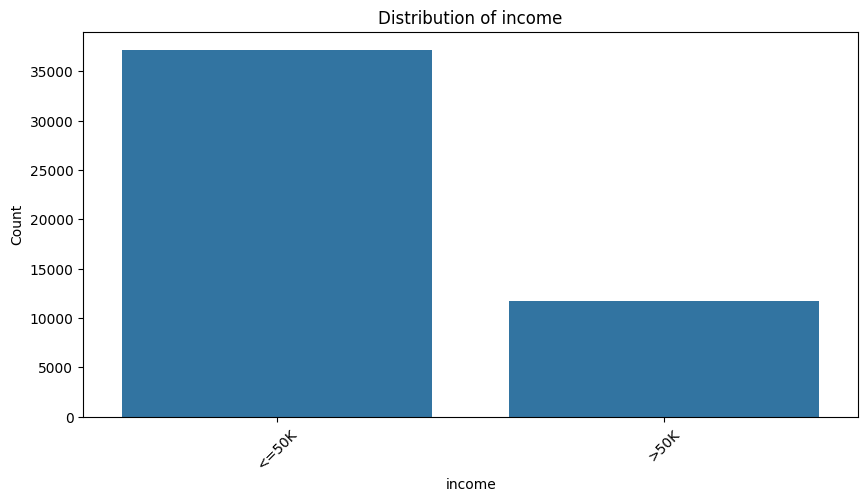

In [7]:
categorical_features = data.select_dtypes(include=['object'])

for column in categorical_features.columns:
    print(f"Feature: {column}")
    print(f"Number of unique values: {data[column].nunique()}")
    print(f"Value counts:\n{data[column].value_counts()}\n")

for column in categorical_features.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=column)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

## 2.2. Числовые признаки

<function matplotlib.pyplot.show(close=None, block=None)>

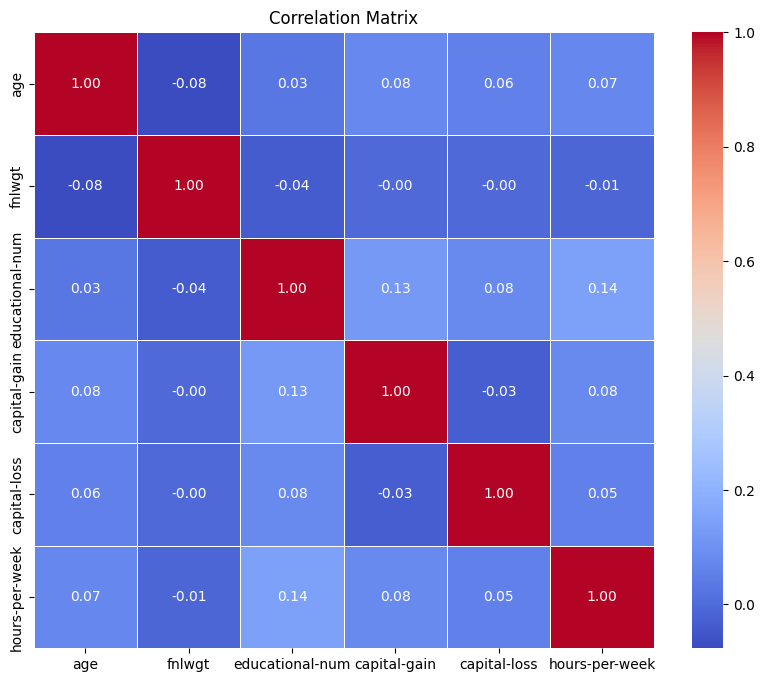

In [8]:
numeric_features = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show

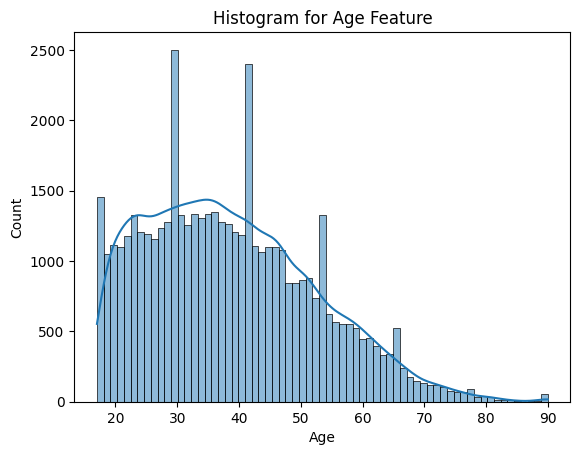

In [9]:
sns.histplot(data['age'], kde=True)
plt.title('Histogram for Age Feature')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

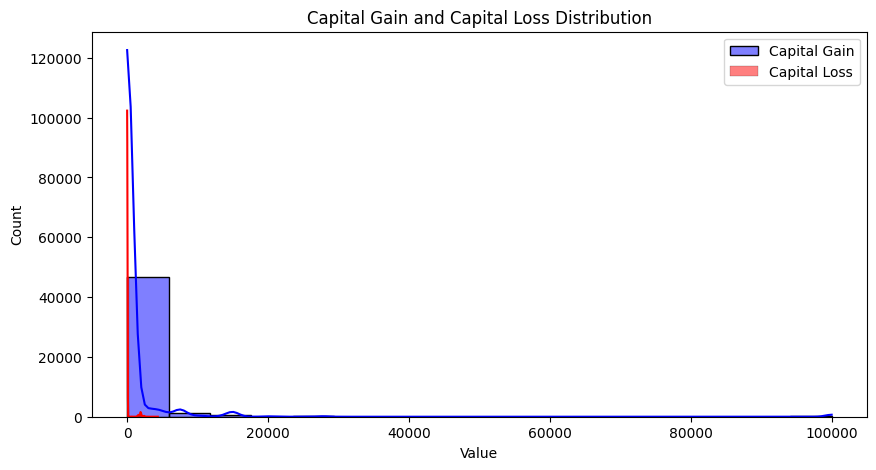

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data['capital-gain'], kde=True, color='blue', label='Capital Gain')
sns.histplot(data['capital-loss'], kde=True, color='red', label='Capital Loss')
plt.title('Capital Gain and Capital Loss Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend()
plt.show()

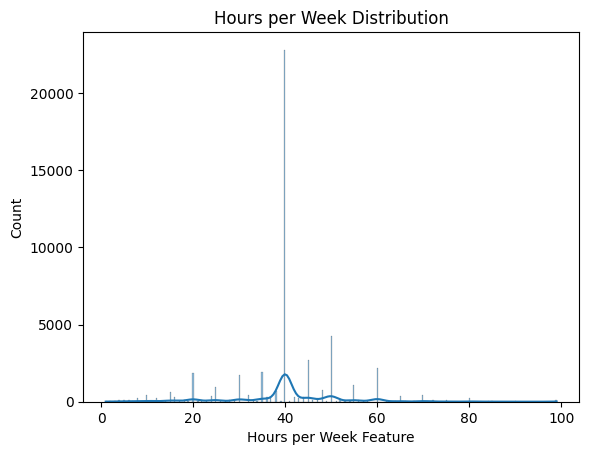

In [11]:
sns.histplot(data['hours-per-week'], kde=True)
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week Feature')
plt.ylabel('Count')
plt.show()

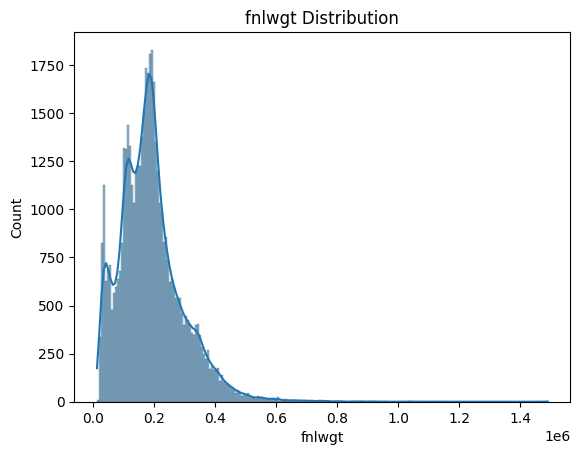

In [12]:
sns.histplot(data['fnlwgt'], kde=True)
plt.title('fnlwgt Distribution')
plt.xlabel('fnlwgt')
plt.ylabel('Count')
plt.show()

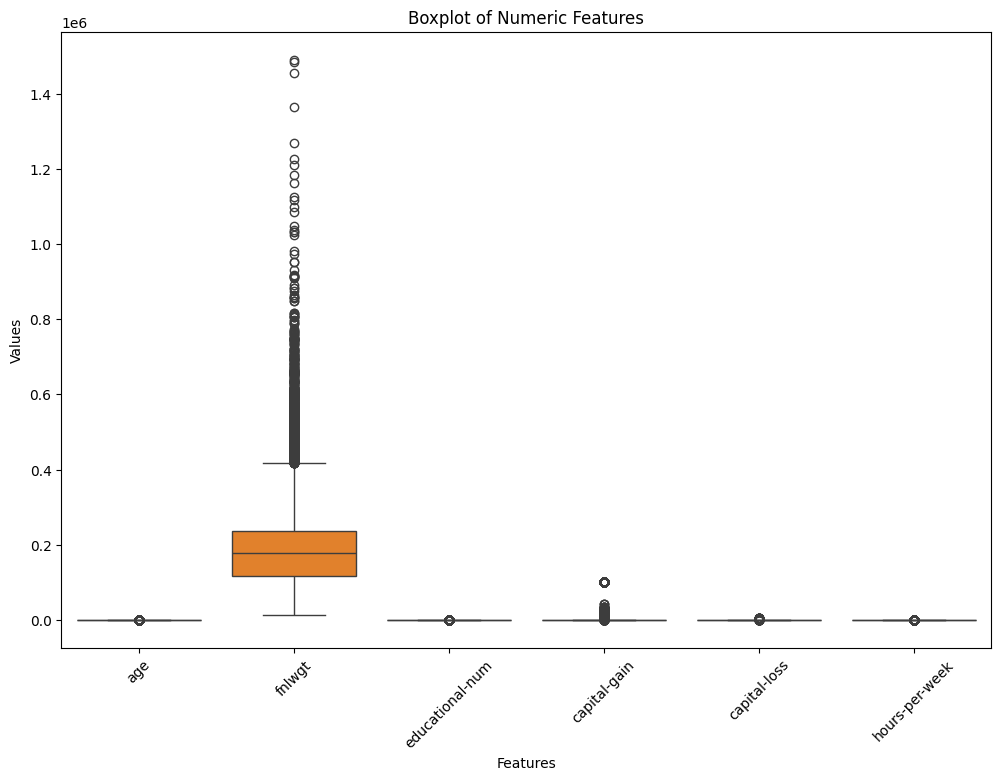

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_features)
plt.title('Boxplot of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# 3. Препроцессинг

- Удалим дубликаты
- Заменим в признаках значение "?" на "Other"
- Избавимся от выбросов
- Закодируем категориальные признаки

In [14]:
clean_data = data.drop_duplicates()

In [15]:
clean_data = data.replace("?", "Other")

In [16]:
categorical_features = ['workclass', 'gender', 'native-country', 'race', 'relationship', 'occupation', 'marital-status']
encoded_data = pd.get_dummies(clean_data, columns=categorical_features, drop_first=True)
encoded_data = encoded_data.drop(columns=['education'])

In [17]:
le = LabelEncoder()
encoded_data['income'] = le.fit_transform(encoded_data['income'])

In [18]:
encoded_data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Other,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,25,226802,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,28,336951,12,0,0,40,1,True,False,False,...,True,False,False,False,False,True,False,False,False,False
3,44,160323,10,7688,0,40,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,18,103497,10,0,0,30,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [19]:
from scipy.stats import skew

def adjusted_boxplot(df: pd.DataFrame, column: pd.Series) -> pd.Series:
    data = df[column]
    skewness = skew(data)
    
    q1 = np.percentile(data, 5)
    q3 = np.percentile(data, 95)
    iqr = q3 - q1
    k = 1.5 * np.exp(-3.5 * skewness)
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    
    filtered_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_data

columns_to_process = ['fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
filtered_data = encoded_data.copy()

for column in columns_to_process:
    filtered_data = adjusted_boxplot(filtered_data, column)

In [20]:
filtered_data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Other,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,25,226802,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,28,336951,12,0,0,40,1,True,False,False,...,True,False,False,False,False,True,False,False,False,False
4,18,103497,10,0,0,30,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
5,34,198693,6,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## 3.1. Визуализируем данные после обработки

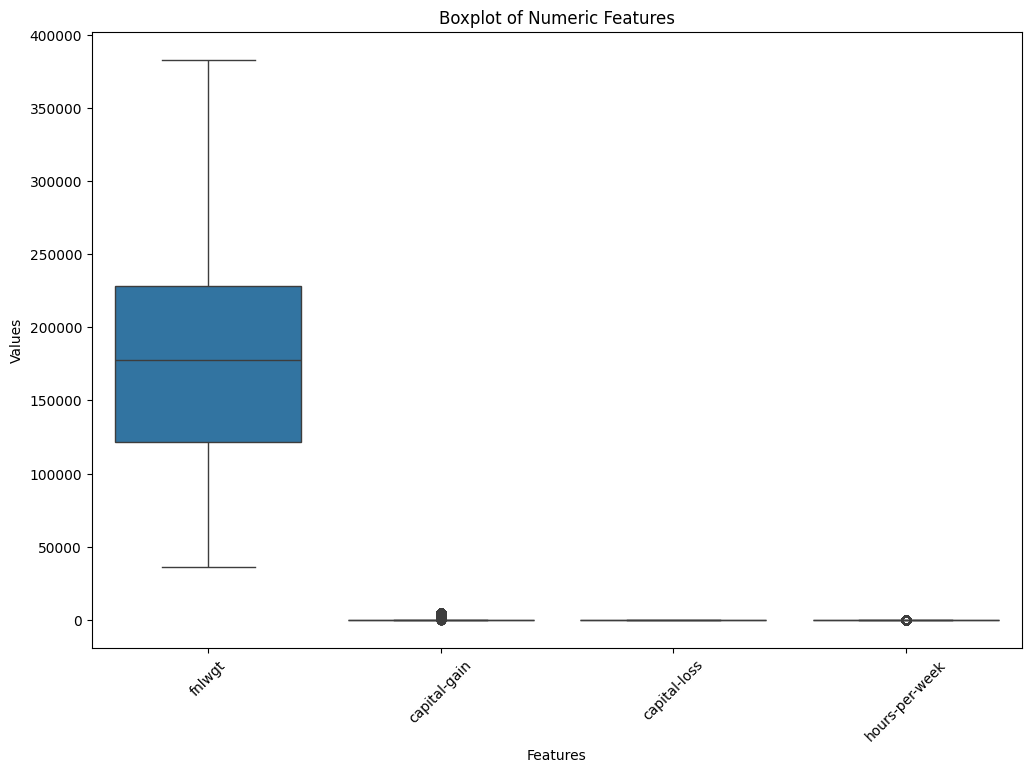

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data[columns_to_process])
plt.title('Boxplot of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

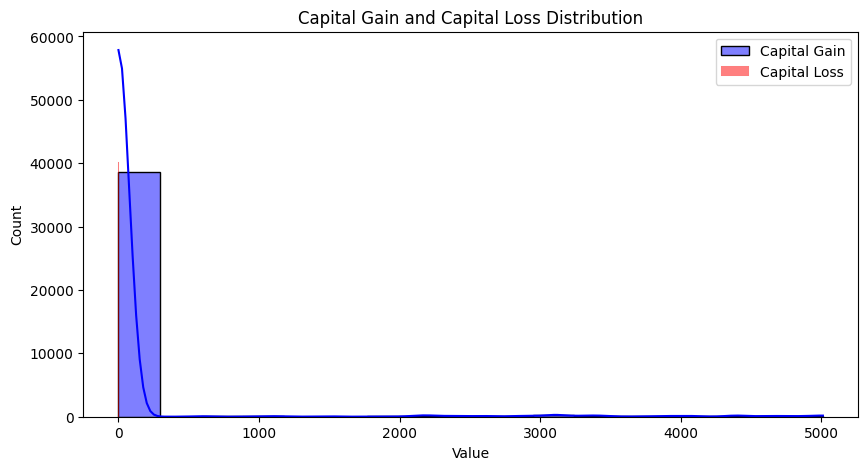

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(filtered_data['capital-gain'], kde=True, color='blue', label='Capital Gain')
sns.histplot(filtered_data['capital-loss'], kde=True, color='red', label='Capital Loss')
plt.title('Capital Gain and Capital Loss Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend()
plt.show()

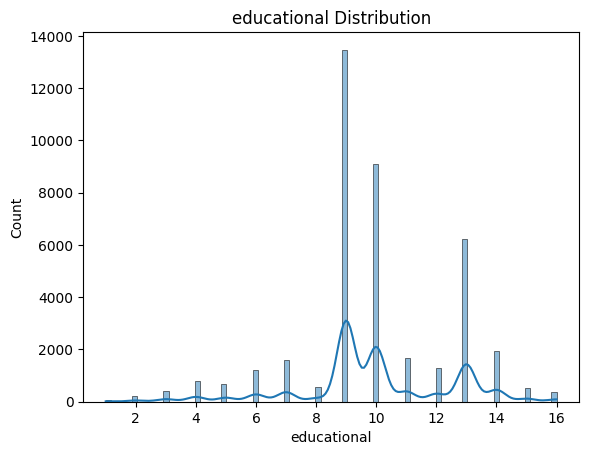

In [23]:
sns.histplot(filtered_data['educational-num'], kde=True)
plt.title('educational Distribution')
plt.xlabel('educational')
plt.ylabel('Count')
plt.show()

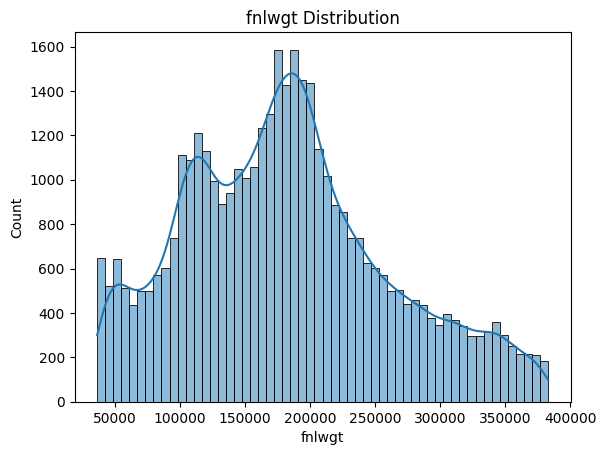

In [24]:
sns.histplot(filtered_data['fnlwgt'], kde=True)
plt.title('fnlwgt Distribution')
plt.xlabel('fnlwgt')
plt.ylabel('Count')
plt.show()

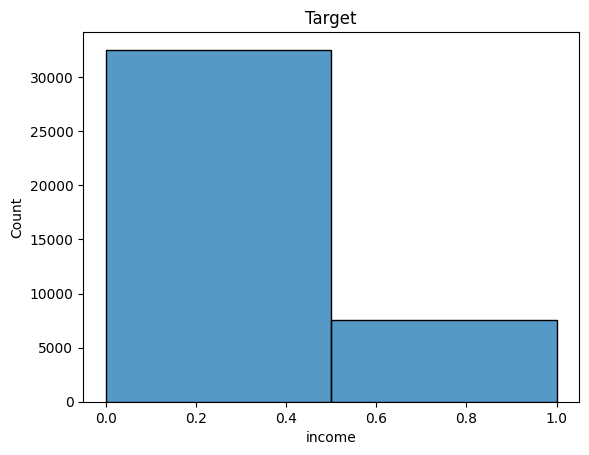

In [25]:
sns.histplot(data=filtered_data, x='income', bins=2)
plt.title('Target')
plt.xlabel('income')
plt.ylabel('Count')
plt.show()

# 3. Разделим тренировочную и тестовую выборки

In [26]:
X = filtered_data.drop(columns=['income'])
y = filtered_data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [27]:
print("Train data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Train data shape: (32112, 85) (32112,)
Test data shape: (8028, 85) (8028,)


In [28]:
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

X_train['age'] = std_scaler.fit_transform(X_train[['age']])
X_test['age'] = std_scaler.fit_transform(X_test[['age']])

columns_to_scale = ['fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'educational-num']
X_train[columns_to_scale] = min_max_scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = min_max_scaler.fit_transform(X_test[columns_to_scale])

# 4. Обучение моделей

## 4.1. Logistic Regression

In [29]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
pred_train_log = log_model.predict(X_train)
pred_test_Log = log_model.predict(X_test)

In [30]:
print(f'Accuracy on Train Data: {accuracy_score(y_train, pred_train_log)}')
print(f'Accuracy on Test Data: {accuracy_score(y_test, pred_test_Log)}')

Accuracy on Train Data: 0.8548206278026906
Accuracy on Test Data: 0.8563776781265571


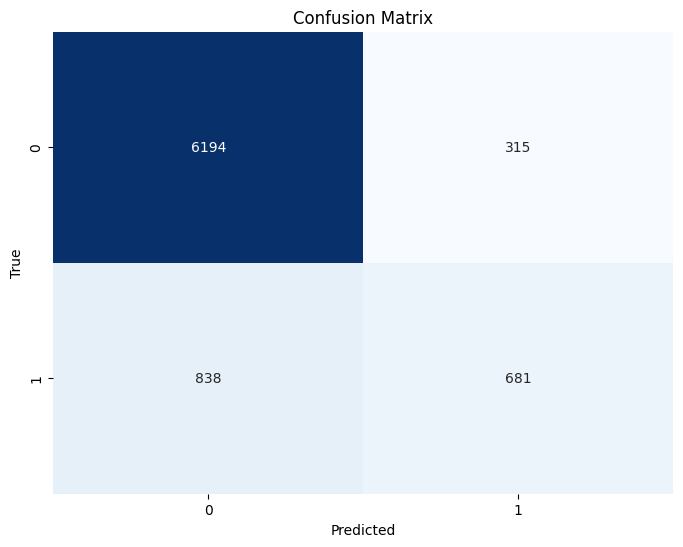

In [31]:
cm = confusion_matrix(y_test, pred_test_Log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

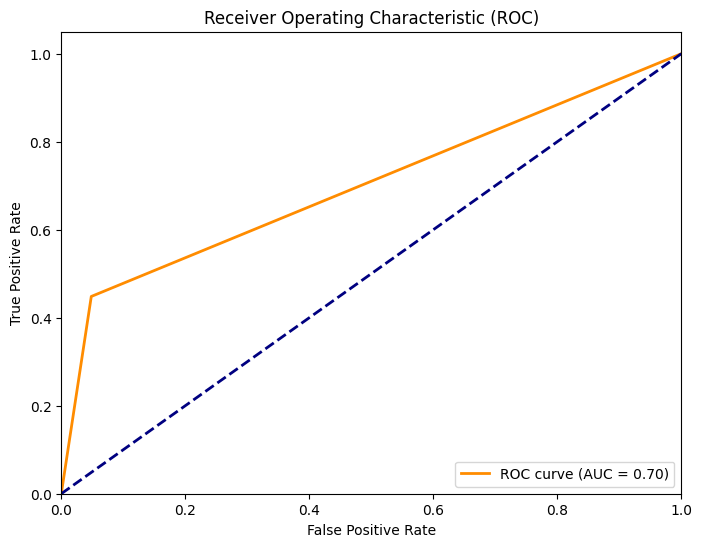

In [32]:
fpr, tpr, _ = roc_curve(y_test, pred_test_Log)
roc_auc = auc(fpr, tpr)

# Визуализируем ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## 4.2. SVM

In [33]:
clf_model = SVC(kernel='poly')
clf_model.fit(X_train, y_train)
pred_train_clf = clf_model.predict(X_train)
pred_test_clf = clf_model.predict(X_test)

In [34]:
print(f'Accuracy on Train Data: {accuracy_score(y_train, pred_train_clf)}')
print(f'Accuracy on Test Data: {accuracy_score(y_test, pred_test_clf)}')

Accuracy on Train Data: 0.8563153961136024
Accuracy on Test Data: 0.8551320378674638


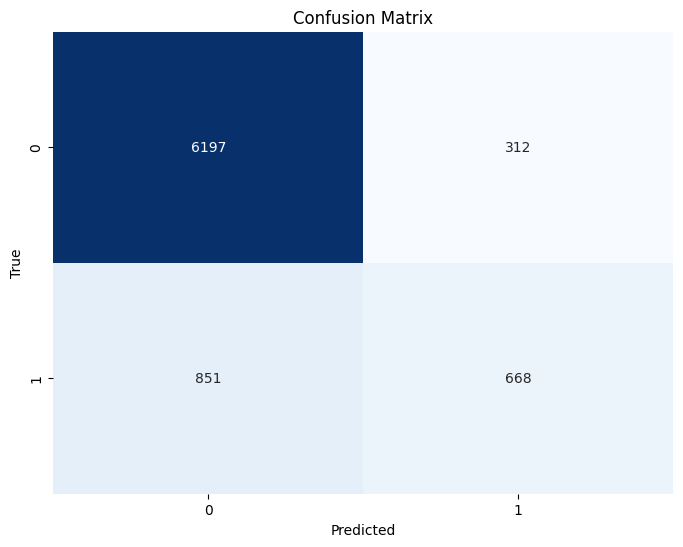

In [35]:
cm = confusion_matrix(y_test, pred_test_clf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

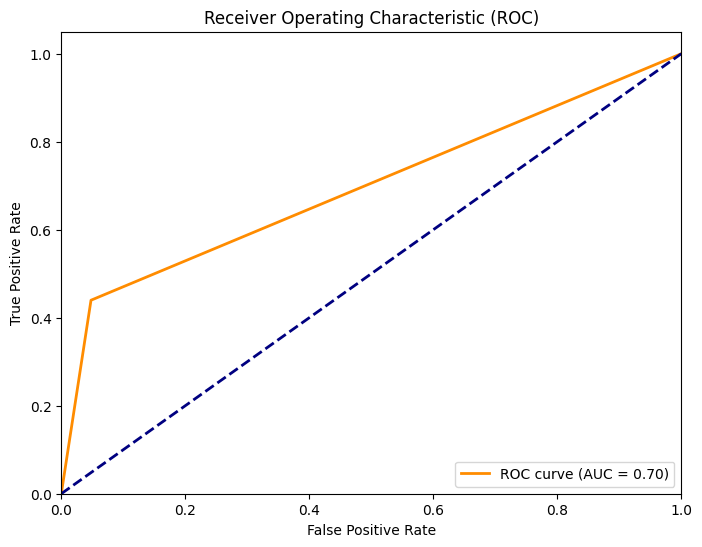

In [36]:
fpr, tpr, _ = roc_curve(y_test, pred_test_clf)
roc_auc = auc(fpr, tpr)

# Визуализируем ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Вывод.

Модели показали хорошие результаты. Для улучшения метрик можно подробнее изучить данные, затюнить модель и найти лучше подход для обработки выбросов.